-----
# Purwadhika Capstone Project Module 3 
![Purwadhika](logo.png)

## Dataset
*Customer Lifetime Value*: https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ

## Contents
- Business Problem Understanding
- Data Preprocessing
- Modeling
- Conclusion
- Recommendation

-----

> ## Business Problem Understanding

**Customer lifetime value** atau CLV, adalah ukuran seberapa berharganya pelanggan bagi perusahaan. Dari nilai tersebut, perusahaan dapat menentukan berapa keuntungan yang diperoleh dari satu penumpang dan biaya yang dikeluarkan untuk memperoleh atau mempertahankan pelanggan baru. Angka ini cukup penting bagi perusahaan untuk mengetahui apakah perusahaan ingin menargetkan pemasaran ke pelanggan yang berharga secara efektif dan bagaimana perubahan pelanggan perusahaan di masa depan.

Jadi sebagai seorang data scientist, kita harus bisa membuat atau membangun model untuk mempredict customer mana saja yang nilai customer lifetime valuenya akan tetap berharga untuk perusahaan kedepannya.


### Library

In [139]:
df.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

In [59]:
# import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import probplot
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, RepeatedKFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.feature_selection import f_classif, mutual_info_classif, mutual_info_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

-----

> ## Data-Preprocessing

### Exploratory Data Analysis (EDA)

In [12]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [13]:
pd.set_option('display.max_colwidth', None)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,3,"[Divorced, Married, Single]"
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


In [19]:
df.shape

(5669, 11)

In [20]:
df.info() # tidak ada missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [21]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [22]:
df.describe(include='all')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669,5669,5669,5669,5669,5669,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
unique,6,3,4,5,3,5,NaN,NaN,NaN,NaN,NaN
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,NaN,NaN,NaN,NaN,NaN
freq,2858,3477,2292,3541,3305,1703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,NaN,NaN,NaN,NaN,NaN,NaN,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,109.000000,549.986128,62464.000000,9031.214859


In [14]:
df.duplicated().sum() # ada 618 data duplikat

618

In [15]:
df.corr()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Number of Policies,1.000000,0.006045,0.005554,-0.007164,0.024721
Monthly Premium Auto,0.006045,1.000000,0.636289,-0.016697,0.402297
Total Claim Amount,0.005554,0.636289,1.000000,-0.353351,0.215354
Income,-0.007164,-0.016697,-0.353351,1.000000,0.025698
Customer Lifetime Value,0.024721,0.402297,0.215354,0.025698,1.000000


In [16]:
df[df.duplicated()].sort_values('Customer Lifetime Value') # mengecek data duplikat

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
4883,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3673,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
3524,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2675,Four-Door Car,Basic,Offer1,Unemployed,Divorced,College,1.0,66.0,316.8,0.0,2004.350666
2763,Four-Door Car,Basic,Offer3,Retired,Married,High School or Below,1.0,61.0,292.8,27972.0,2227.072755
...,...,...,...,...,...,...,...,...,...,...,...
2592,Sports Car,Basic,Offer2,Employed,Married,High School or Below,2.0,109.0,523.2,20090.0,34611.378960
4053,Four-Door Car,Premium,Offer1,Employed,Divorced,High School or Below,2.0,119.0,571.2,46587.0,41787.903430
2486,Four-Door Car,Premium,Offer1,Employed,Divorced,High School or Below,2.0,119.0,571.2,46587.0,41787.903430
1840,Four-Door Car,Premium,Offer1,Employed,Divorced,High School or Below,2.0,119.0,571.2,46587.0,41787.903430


In [17]:
df.drop_duplicates(inplace=True) # drop data duplikat

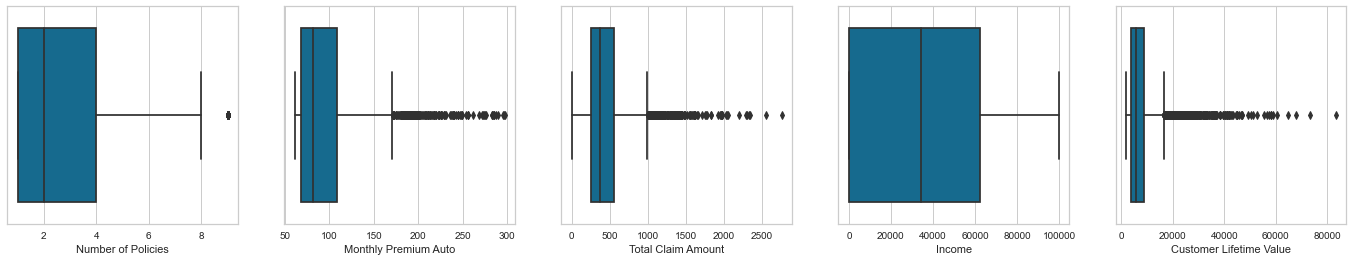

In [104]:
# Outliers

plt.figure(figsize=(24,4))
num_subplot = 1

for i in df.describe().columns:
    plt.subplot(1,5,num_subplot)
    sns.boxplot(data=df, x=i),
    num_subplot+=1  

Setelah melihat boxplot di atas, outlier yang akan di drop adalah kolom 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value', karena outlier terlalu besar.

In [105]:
# Membuat fungsi untuk melihat iqr 

def iqr(data):
    q1 = df[data].quantile(0.25)
    q3 = df[data].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'Nilai IQR {data}: {iqr}')

    upper = q3 + limit
    lower = q1 - limit
    print(f'Nilai Batas Atas: {upper}')
    print(f'Nilai Batas Bawah: {lower}')

In [111]:
print(f"{iqr('Number of Policies')}")
print("----------------------------")
print(f"{iqr('Monthly Premium Auto')}")
print("----------------------------")
print(f"{iqr('Total Claim Amount')}")
print("----------------------------")
print(f"{iqr('Customer Lifetime Value')}")

Nilai IQR Number of Policies: 3.0
Nilai Batas Atas: 8.5
Nilai Batas Bawah: -3.5
None
----------------------------
Nilai IQR Monthly Premium Auto: 41.0
Nilai Batas Atas: 170.5
Nilai Batas Bawah: 6.5
None
----------------------------
Nilai IQR Total Claim Amount: 296.34681750000004
Nilai Batas Atas: 992.6433477500001
Nilai Batas Bawah: -192.74392225000005
None
----------------------------
Nilai IQR Customer Lifetime Value: 5064.1236284999995
Nilai Batas Atas: 16624.75007525
Nilai Batas Bawah: -3631.744438749999
None


In [113]:
# Drop Outlier 

outlier = df[(df['Monthly Premium Auto'] > 200) | (df['Customer Lifetime Value'] > 16700) | (df['Total Claim Amount'] > 1000)]
df = df.drop(index= outlier.index)

> ## Modeling

### Feature Selection

In [114]:
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [115]:
# Define x y

X = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']

# Data Splitting

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2023)


### Feature Engineering

In [116]:
transformer = ColumnTransformer(
    [
    ('OHE', OneHotEncoder(drop='first'),['Vehicle Class','Renew Offer Type','EmploymentStatus','Marital Status']),
    ('Orde', OrdinalEncoder(),['Coverage','Education']),
    ('Robust', RobustScaler(),['Number of Policies','Monthly Premium Auto','Total Claim Amount','Income'])
    ], remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Renew Offer Type',
                                  'EmploymentStatus', 'Marital Status']),
                                ('Orde', OrdinalEncoder(),
                                 ['Coverage', 'Education']),
                                ('Robust', RobustScaler(),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income'])])

In [ ]:
# ?XGBRegressor

### Benchmark Model

In [117]:
# Define algorithm

lr = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(max_depth=5, random_state=1)
bag = BaggingRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
adaboost = AdaBoostRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_bag = TransformedTargetRegressor(bag, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(adaboost, func=np.log, inverse_func=np.exp)
log_tree = TransformedTargetRegressor(tree, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

scaler = RobustScaler()

models = [log_lr, log_knn, log_bag, log_ada,log_tree, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-2880.25485904 -2950.01787309 -2850.05815789 -2920.86352056
 -2654.42907863] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1989.15392225 -2065.09647005 -2049.04875667 -2004.68234605
 -1917.52398917] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.31829632 -0.33473285 -0.32063613 -0.31957343 -0.3316529 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-2725.45303343 -2832.09066502 -2779.93435544 -2819.98857093
 -2543.45625832] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-1703.78083772 -1758.97969985 -1811.87932852 -1805.2496999
 -1668.94747269] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                     

In [119]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'Bagging Regressor', 'AdaBoost Regressor','DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-2851.124698,104.098255,-2005.101097,51.875002,-0.324978,0.006818
1,KNN Regressor,-2740.184577,105.180322,-1749.767408,55.977975,-0.288749,0.009061
2,Bagging Regressor,-957.962650,39.114237,-363.712247,18.732079,-0.043724,0.001484
3,AdaBoost Regressor,-1257.068123,56.378203,-767.958022,41.680878,-0.105802,0.006114
4,DecisionTree Regressor,-990.487278,57.126284,-486.816223,15.371254,-0.064158,0.001463
5,RandomForest Regressor,-932.109026,47.698813,-355.363371,19.457927,-0.042427,0.001521
6,XGBoost Regressor,-934.619840,68.976839,-379.405586,21.539017,-0.048842,0.001833


In [123]:
# Benchmark 2 model terbaik
models = {
    'Bagging': BaggingRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
Bagging,1055.663385,412.588652,0.048256
RandomForest,1002.354121,395.060812,0.045806


- Jadi algoritma terbaik untuk dataset kita dari MAE dan MAPE adalah yaitu `RandomForestRegressor` karena nilai mean MAE-nya paling kecil yang artinya performa model paling bagus atau error-nya paling kecil dan std MAE-nya cukup kecil yang artinya performa model cukup stabil. Selain itu ktia juga akan mengambil model tarbaik kedua dari hasil MAE dan MAPE yaitu `Bagging Regressor` untuk diuji.

Selanjutnya kita akan melakukan hyperparameter tuning ke algoritma terpilih.

### Hyperparameter Tuning (Optimization)

#### Bagging Regressor

In [124]:
# hyperparameter
hyperparam = {
    'modeling__n_estimators': [20,50,100],
    'modeling__max_samples': [0.5,1.0],
    'modeling__max_features': [0.5,1.0],
    'modeling__bootstrap': [True, False], 
    'modeling__bootstrap_features': [True, False]
}


# algo (benchmark model)
model = BaggingRegressor(random_state=0)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_model,                  
    param_grid= hyperparam,                 
    cv= 5,                                  
    scoring= ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],    
    refit = 'neg_mean_absolute_error', 
    n_jobs= -1                              
)

# fit
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'EmploymentStatus',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Orde',
                                                                         OrdinalEncoder(),
                                                                         ['Coverage',
                                                                          'Education']),
                                                                        ('Robust',
                                                                         RobustScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies',
                                                                          'Monthly '
                                                                          'Premium '
                                                                          'A...
                                        BaggingRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__bootstrap': [True, False],
                         'modeling__bootstrap_features': [True, False],
                         'modeling__max_features': [0.5, 1.0],
                         'modeling__max_samples': [0.5, 1.0],
                         'modeling__n_estimators': [20, 50, 100]},
             refit='neg_mean_absolute_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [125]:
gridsearch.best_params_

{'modeling__bootstrap': True,
 'modeling__bootstrap_features': False,
 'modeling__max_features': 1.0,
 'modeling__max_samples': 0.5,
 'modeling__n_estimators': 100}

In [126]:
gridsearch.best_score_

-369.3937500605707

In [129]:
pd.DataFrame(gridsearch.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__bootstrap,param_modeling__bootstrap_features,param_modeling__max_features,param_modeling__max_samples,param_modeling__n_estimators,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
20,0.819999,0.027554,0.028400,0.001357,True,False,1.0,0.5,100,"{'modeling__bootstrap': True, 'modeling__bootstrap_features': False, 'modeling__max_features': 1.0, 'modeling__max_samples': 0.5, 'modeling__n_estimators': 100}",...,21.960081,1,-0.042905,-0.041535,-0.045152,-0.048748,-0.042210,-0.044110,0.002619,1
19,0.439600,0.010249,0.017800,0.000979,True,False,1.0,0.5,50,"{'modeling__bootstrap': True, 'modeling__bootstrap_features': False, 'modeling__max_features': 1.0, 'modeling__max_samples': 0.5, 'modeling__n_estimators': 50}",...,24.136830,2,-0.042402,-0.041473,-0.046271,-0.048704,-0.041707,-0.044111,0.002878,2
44,1.085200,0.053485,0.032200,0.003060,False,False,1.0,0.5,100,"{'modeling__bootstrap': False, 'modeling__bootstrap_features': False, 'modeling__max_features': 1.0, 'modeling__max_samples': 0.5, 'modeling__n_estimators': 100}",...,26.267204,5,-0.042525,-0.043374,-0.046044,-0.049330,-0.042694,-0.044794,0.002597,5
18,0.179600,0.004128,0.010600,0.000490,True,False,1.0,0.5,20,"{'modeling__bootstrap': True, 'modeling__bootstrap_features': False, 'modeling__max_features': 1.0, 'modeling__max_samples': 0.5, 'modeling__n_estimators': 20}",...,20.307976,4,-0.043268,-0.042387,-0.047405,-0.047563,-0.042706,-0.044666,0.002319,3
43,0.547399,0.046932,0.019401,0.000490,False,False,1.0,0.5,50,"{'modeling__bootstrap': False, 'modeling__bootstrap_features': False, 'modeling__max_features': 1.0, 'modeling__max_samples': 0.5, 'modeling__n_estimators': 50}",...,27.248604,3,-0.042993,-0.043320,-0.045276,-0.050067,-0.042291,-0.044789,0.002818,4


#### Random Forest Regressor

In [34]:
# ?RandomForestRegressor

In [130]:
# hyperparameter
hyperparam = {
    'modeling__n_estimators': [100,200,50],
    'modeling__criterion': ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
    'modeling__max_features': ['sqrt', 'log2', None],
    'modeling__max_depth': range(1,31,5), 
    'modeling__min_samples_split': range(2,31,3)
}


# algo (benchmark model)
model = RandomForestRegressor(random_state=0)

# pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# gridsearch
gridsearch = GridSearchCV(
    estimator= pipe_model,                  
    param_grid= hyperparam,                 
    cv= 5,                                  
    scoring= ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],    
    refit = 'neg_mean_absolute_error',  
    n_jobs= -1                              
)

# fit
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'EmploymentStatus',
                                                                          'Marital '
                                                                          'Status']),
                                                                        ('Orde',
                                                                         OrdinalEncoder(),
                                                                         ['Coverage',
                                                                          'Education']),
                                                                        ('Robust',
                                                                         RobustScaler(),
                                                                         ['Number '
                                                                          'of '
                                                                          'Policies',
                                                                          'Monthly '
                                                                          'Premium '
                                                                          'A...
             param_grid={'modeling__criterion': ['absolute_error',
                                                 'squared_error',
                                                 'friedman_mse', 'poisson'],
                         'modeling__max_depth': range(1, 31, 5),
                         'modeling__max_features': ['sqrt', 'log2', None],
                         'modeling__min_samples_split': range(2, 31, 3),
                         'modeling__n_estimators': [100, 200, 50]},
             refit='neg_mean_absolute_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [131]:
gridsearch.best_params_

{'modeling__criterion': 'absolute_error',
 'modeling__max_depth': 11,
 'modeling__max_features': None,
 'modeling__min_samples_split': 29,
 'modeling__n_estimators': 200}

In [132]:
gridsearch.best_score_

-331.5268009313573

In [133]:
pd.DataFrame(gridsearch.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__criterion,param_modeling__max_depth,param_modeling__max_features,param_modeling__min_samples_split,param_modeling__n_estimators,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
2069,0.449600,0.007337,0.012400,0.000800,poisson,21,None,29,50,"{'modeling__criterion': 'poisson', 'modeling__max_depth': 21, 'modeling__max_features': None, 'modeling__min_samples_split': 29, 'modeling__n_estimators': 50}",...,22.478092,431,-0.044883,-0.043231,-0.045252,-0.049887,-0.042809,-0.045212,0.002516,432
2159,0.444949,0.014236,0.010800,0.000980,poisson,26,None,29,50,"{'modeling__criterion': 'poisson', 'modeling__max_depth': 26, 'modeling__max_features': None, 'modeling__min_samples_split': 29, 'modeling__n_estimators': 50}",...,22.478092,431,-0.044883,-0.043231,-0.045252,-0.049887,-0.042809,-0.045212,0.002516,432
1889,0.448200,0.008952,0.012201,0.000400,poisson,11,None,29,50,"{'modeling__criterion': 'poisson', 'modeling__max_depth': 11, 'modeling__max_features': None, 'modeling__min_samples_split': 29, 'modeling__n_estimators': 50}",...,22.893921,424,-0.044792,-0.043114,-0.045242,-0.049998,-0.042723,-0.045174,0.002595,425
1979,0.443800,0.008841,0.011800,0.000400,poisson,16,None,29,50,"{'modeling__criterion': 'poisson', 'modeling__max_depth': 16, 'modeling__max_features': None, 'modeling__min_samples_split': 29, 'modeling__n_estimators': 50}",...,22.486931,428,-0.044870,-0.043231,-0.045252,-0.049886,-0.042809,-0.045210,0.002516,431
1886,0.453627,0.006653,0.012001,0.000631,poisson,11,None,26,50,"{'modeling__criterion': 'poisson', 'modeling__max_depth': 11, 'modeling__max_features': None, 'modeling__min_samples_split': 26, 'modeling__n_estimators': 50}",...,23.035474,376,-0.044329,-0.042738,-0.044961,-0.049692,-0.042562,-0.044856,0.002585,371


### Predict To Test Set

In [134]:
# Model Random Forest
model = {'rf': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = gridsearch.best_estimator_

# Fitting model
rf_tuning.fit(x_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
rf,1118.574731,379.984716,0.04221


In [135]:
# algo
model = rf

# pipeline
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# fit
pipe_model.fit(x_train, y_train)

# predict
y_pred_before = pipe_model.predict(x_test)

# MAE pada model sebelum tuning
mean_absolute_error(y_test, y_pred_before)

394.9479222540672

In [136]:
# define best model (after tuning)
best_model = gridsearch.best_estimator_

# fit
best_model.fit(x_train, y_train)

# predict
y_pred_after = best_model.predict(x_test)

# MAE untuk model setelah tuning
mean_absolute_error(y_test, y_pred_after)

379.9847161872238

In [137]:
# compare
print(mean_absolute_error(y_test, y_pred_before), 'MAE sebelum tuning')
print(mean_absolute_error(y_test, y_pred_after), 'MAE setelah tuning')

394.9479222540672 MAE sebelum tuning
379.9847161872238 MAE setelah tuning


In [141]:
# residual = y_actual - y_prediksi
residual = y_test - y_pred_after

df_residual = pd.DataFrame({
    'y_pred': y_pred_after,
    'residual': residual 
})

df_residual.head()

,y_pred,residual
2277,5671.189518,-0.747122
1197,4897.631698,227.352693
3882,5280.581704,12.786385
3235,8648.805098,-1735.238573
2622,14760.734737,406.309283


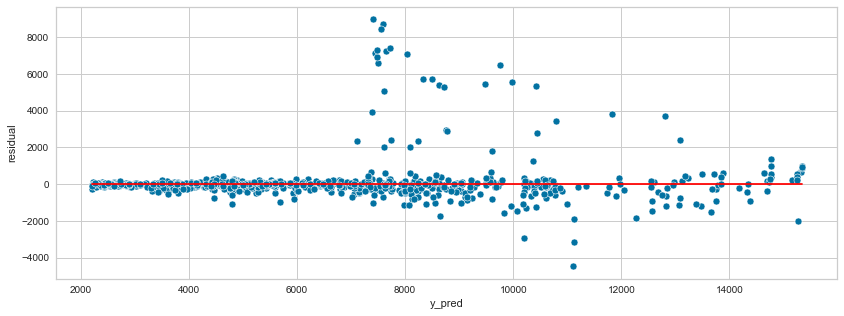

In [142]:
# Residual Plot

plt.figure(figsize=(14,5))
sns.scatterplot(data=df_residual, x='y_pred', y='residual')
sns.lineplot(data=df_residual, x='y_pred', y=0, color='red');

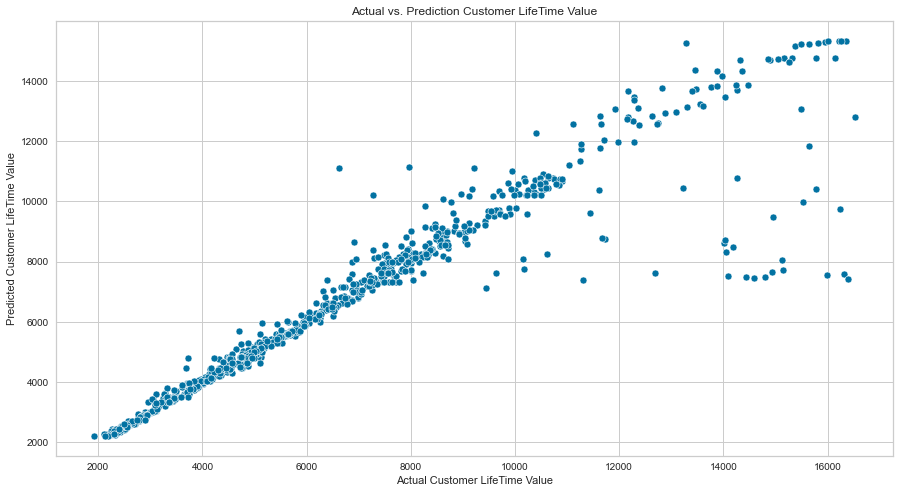

In [138]:
plt.figure(figsize=(15, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction Customer LifeTime Value', 
                                               xlabel='Actual Customer LifeTime Value', 
                                               ylabel='Predicted Customer LifeTime Value');

Feature Importance

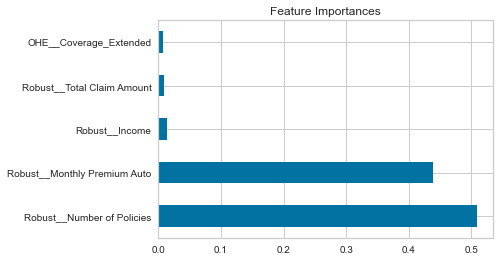

In [96]:
# Plot feature importances

feature_imp = pd.Series(rf_tuning['modeling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

> ## Conclusion

- Berdasarkan pemodelan yang sudah dilakukan, fitur `Number of Policies` dan `Monthly Premium Auto` menjadi fitur yang paling berpengaruh terhadap `Customer Lifetime Value`.

- Metrik evaluasi yang digunakan pada model adalah nilai `RMSE, MAE & MAPE`. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~4%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan Customer Lifetime Value baru pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan nilai rata-ratanya akan meleset kurang lebih sebesar 4% dari nilai yang seharusnya.

- Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi.

> ## Recommendation

Hal  yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti :
- Terus meningkatkan model, misalkan meningkatkan model dengan menambahkan data baru, menyesuaikan parameter, dan menambahkan fitur baru. Hal ini dapat membantu meningkatkan kinerja model secara bertahap.
- Mengecek prediksi mana saja yang memiliki error yang tinggi, kemudian dieksplorasi lebih lanjut untuk feature apa saja yang mengakibatkan error tinggi.
- Model yang sudah dibangun ini dapat dimanfaatkan untuk pengembangan model selanjutnya seperti mengeksplore dengan menggunakan metode unsupervised learning dengan menggunakan clustering untuk dapat melakukan segmentasi customer mana yang berharga dan tidak agar penentuan strategi marketing lebih baik lagi.

## Save Model

In [144]:
#Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', RandomForestRegressor())])
# estimator.fit(x_train, y_train)

# pickle.dump(estimator, open('Model_CLV_RF.sav', 'wb'))

In [ ]:
# Load model
# filename = 'Model_Airbnb_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))